<a href="https://colab.research.google.com/github/nataliyabulkina/Origin_16.07.22/blob/main/Untitl24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
d = pd.read_csv('ab_stats.csv')

# читаем первые 5 строк
d.head()


,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814


In [10]:
# Рассчитываем ARPPU для каждой группы

# Фильтруем платящих пользователей (тех, кто совершил хотя бы одну покупку)
paying_users_A = d [(d['ab_group'] == 'A') & (d['num_purchases'] > 0)]
paying_users_B = d [(d['ab_group'] == 'B') & (d['num_purchases'] > 0)]

# Рассчитываем общий доход и количество платящих пользователей для каждой группы
total_revenue_A = paying_users_A['revenue'].sum()
total_revenue_B = paying_users_B['revenue'].sum()

num_paying_users_A = len(paying_users_A)
num_paying_users_B = len(paying_users_B)

# Рассчитываем ARPPU
ARPPU_A = total_revenue_A / num_paying_users_A if num_paying_users_A > 0 else 0
ARPPU_B = total_revenue_B / num_paying_users_B if num_paying_users_B > 0 else 0

ARPPU_A, ARPPU_B

(18.698468640625, 12.36211875641025)


## Мы можем провести t-тест. Для этого нам нужно взять доходы только от платящих пользователей в каждой из групп и сравнить их.

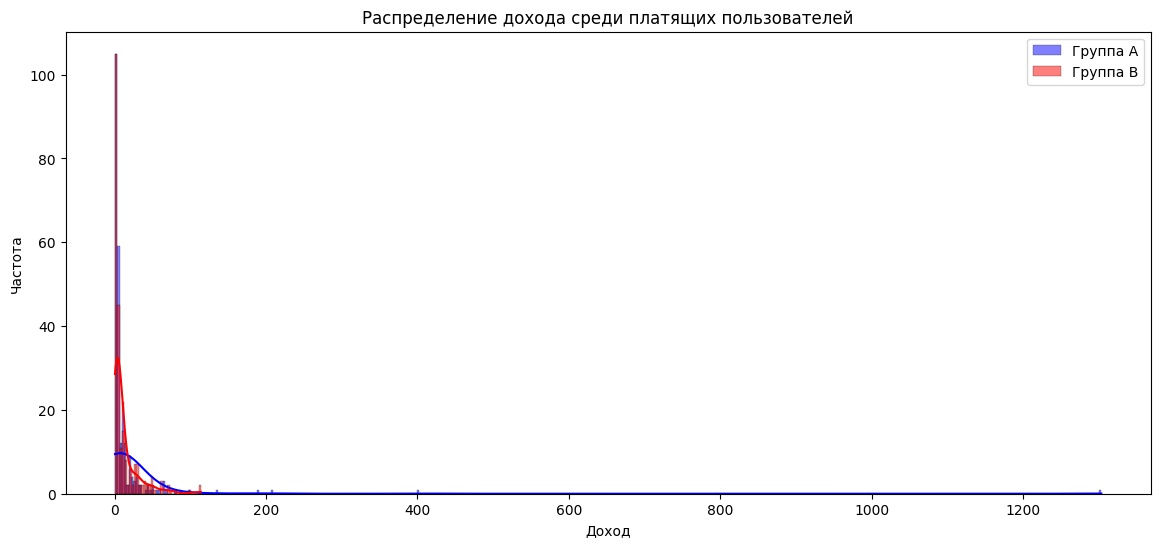

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построим график распределения дохода для обеих групп
plt.figure(figsize=(14, 6))

sns.histplot(paying_users_A['revenue'], color="blue", label="Группа A", kde=True)
sns.histplot(paying_users_B['revenue'], color="red", label="Группа B", kde=True)

plt.title('Распределение дохода среди платящих пользователей')
plt.xlabel('Доход')
plt.ylabel('Частота')
plt.legend()

plt.show()

In [12]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(paying_users_A['revenue'], paying_users_B['revenue'], alternative='two-sided')

p_value

0.8871956616344514

Полученное значение уровня значимости (p-value) в результате теста Манна-Уитни равно приблизительно 0.89. Это значение значительно превышает уровень значимости, обычно принятый на уровне 0.05. В связи с этим у нас нет достаточных оснований для того, чтобы отклонить нулевую гипотезу о том, что распределения доходов в группах A и B не отличаются друг от друга.

Таким образом, хотя ARPPU в группе A выше, чем в группе B, мы не обнаружили статистически значимых различий.

С учетом этих данных рекомендации для менеджера могут включать в себя следующее:

Воздержаться от деления выводов относительно различий в ARPPU между группами A и B на основе текущего эксперимента, так как эти различия не являются статистически значимыми.
Провести анализ других метрик или факторов, которые могут оказывать влияние на доходы. Например, рассмотреть влияние различных категорий пользователей или типов продуктов на доход.
Рассмотреть возможность проведения дополнительных A/B тестов с расширенным количеством участников или внесением других изменений с целью достижения статистически значимого увеличения ARPPU.


# Новый раздел